In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/data/get_homologues_cluster_size_analysis.csv"

In [45]:
# This was run with -e flag to exclude all paralogs

gh_df = pd.read_csv(data, index_col=[0, 1])
gh_df.fillna(0, inplace=True)
test = gh_df.loc["id_C75_S1"]
test.drop(0.0, axis='index', inplace=True)
test

COG    OCML     pan
Unnamed: 1                        
1.0         6497.0     0.0     0.0
2.0         1242.0  1243.0  1095.0
3.0          576.0   575.0   483.0
4.0          373.0   368.0   311.0
5.0          263.0   252.0   203.0
6.0          180.0   184.0   143.0
7.0          135.0   148.0   114.0
8.0           88.0    92.0    73.0
9.0           74.0    72.0    55.0
10.0          83.0    86.0    69.0
11.0         104.0   122.0    93.0
12.0         106.0   100.0    85.0
13.0         110.0    97.0    79.0
14.0         226.0   255.0   202.0
15.0         724.0   724.0   665.0
16.0        2077.0  2094.0  2026.0

In [46]:
x = list(test.index)
pan = test.pan
pan

Unnamed: 1
1.0        0.0
2.0     1095.0
3.0      483.0
4.0      311.0
5.0      203.0
6.0      143.0
7.0      114.0
8.0       73.0
9.0       55.0
10.0      69.0
11.0      93.0
12.0      85.0
13.0      79.0
14.0     202.0
15.0     665.0
16.0    2026.0
Name: pan, dtype: float64

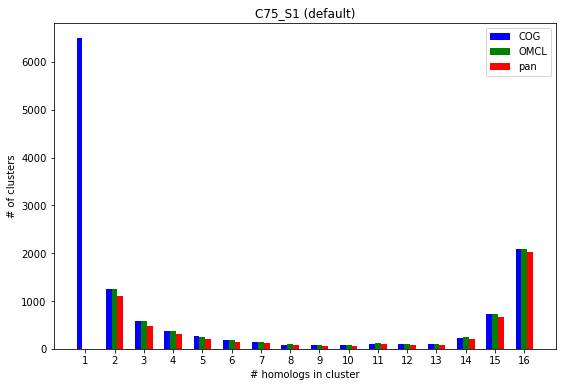

In [53]:
ax = plt.subplot(111)

x1 = [x-0.2 for x in list(test.index)]
x2 = list(test.index)
x3 = [x+0.2 for x in list(test.index)]

ax.bar(x1, test.COG, width=0.2, color='b', align='center')
ax.bar(x2, test.OCML, width=0.2, color='g', align='center')
ax.bar(x3, test.pan, width=0.2, color='r', align='center')
ax.set_xticks(list(test.index));
ax.set_title("C75_S1 (default)")
ax.set_xlabel("# homologs in cluster")
ax.set_ylabel("# of clusters")
f = plt.gcf()
f.set_size_inches(9,6)
ax.legend(["COG", "OMCL", "pan"])

In [54]:
conditions = list(gh_df.index.levels[0])
conditions

['id_C50_S1',
 'id_C50_S70',
 'id_C50_S90',
 'id_C60_S1',
 'id_C60_S70',
 'id_C60_S90',
 'id_C70_S1',
 'id_C70_S70',
 'id_C70_S90',
 'id_C75_S1',
 'id_C75_S70',
 'id_C75_S90']

In [127]:

def plotClusterSizes(C, S): #both could be lists
    
    fig, axs = plt.subplots(len(C),len(S), sharex=True, sharey=True)
    
    fig.set_size_inches(20.5, 14.5)
    conds = [(c,s) for c in C for s in S]
    coords = [(x, y) for x in range(len(C))for y in range(len(S))]
    for co, cd in zip(coords, conds):
        df = gh_df.loc["id_C{}_S{}".format(cd[0], cd[1])]  
        df.drop(0.0, axis='index', inplace=True)
        x = list(df.index)
        pan = df.pan
        a = axs[co[0], co[1]]
        a.bar(x, pan)
        a.set_title("C{}_S{}".format(cd[0], cd[1]))
        a.set_xlabel("# homologs in cluster")
        a.set_ylabel("# of clusters")
        a.set_xticks(list(x))
    

[(50, 1), (50, 70), (50, 90), (60, 1), (60, 70), (60, 90), (70, 1), (70, 70), (70, 90), (75, 1), (75, 70), (75, 90)]
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]


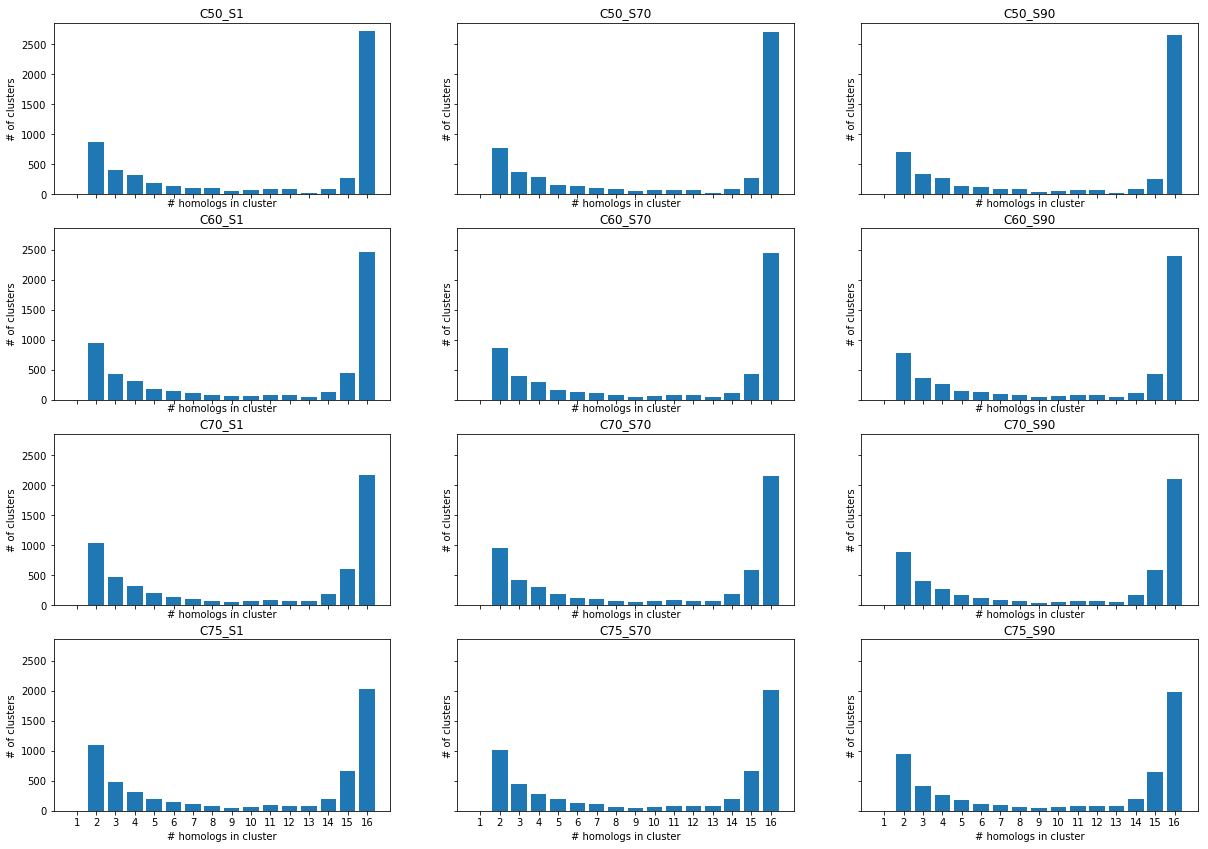

In [128]:

C = [50, 60, 70, 75]
S = [1,70,90]
plotClusterSizes(C, S)

In [140]:
# Genome composition analysis 

# This data are from original get_homologue ran under default parameters

pangenome = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/DE/2018-01-16-sync-genomes/data/genomes_homologues/pan_genome_algOMCL.tab"
pangenome_df = pd.read_csv(pangenome, sep = "\t")
pangenome_df.drop(["Unnamed: 16"], axis = 1, inplace = True)
df = pangenome_df.T
df.index = [i.split('g')[1] for i in list(df.index)]
df

0     1     2     3     4     5     6     7     8     9
1   5159  5832  4671  4671  4614  4908  4749  4862  4614  4862
2   5774  6353  5091  5320  5198  5329  5160  5516  5160  5470
3   6007  6641  5540  5637  5509  5566  5554  5797  5431  6252
4   6365  6777  5738  5933  5763  5873  5789  6005  5634  6646
5   6657  6946  6498  6114  6058  6161  6158  6289  5935  7409
6   6840  7081  6601  6809  6338  6494  6434  6466  6133  7591
7   6963  7761  7148  6898  6835  7015  6555  6675  6816  7682
8   7151  7951  7320  7013  6935  7193  6669  6802  7075  7839
9   7385  8089  7494  7088  7130  7363  6749  7056  7269  7930
10  7604  8180  7550  7305  7257  7484  6962  7155  7334  8076
11  7671  8381  7742  7462  7902  7625  7077  7555  7461  8149
12  8033  8566  7899  7554  7963  8279  7709  7628  7564  8214
13  8155  8716  7977  7624  8026  8355  7877  7671  7659  8271
14  8208  8765  8091  8028  8079  8409  8247  7825  7864  8366
15  8285  8836  8139  8137  8120  8447  8392  7887  8205  8509
16  8360  8971  8274  8272  8255  8517  8462  8501  8254  8547

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


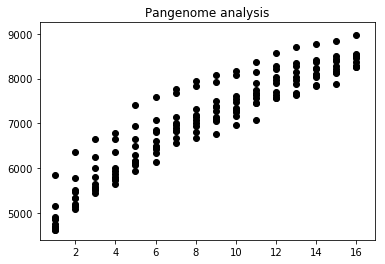

In [182]:
for i in range(0, 16):
    x = [i+1]*10
    y = df.iloc[i]
    plt.scatter(x,y, color = "k")

plt.title("Pangenome analysis")
f = plt.gcf()
ti = list(map(int, list(df.index)))
print(ti)
f.set_xticks = ti
f.ylabel = "# of genes"
     



In [183]:
test

COG    OCML     pan
Unnamed: 1                        
1.0         6497.0     0.0     0.0
2.0         1242.0  1243.0  1095.0
3.0          576.0   575.0   483.0
4.0          373.0   368.0   311.0
5.0          263.0   252.0   203.0
6.0          180.0   184.0   143.0
7.0          135.0   148.0   114.0
8.0           88.0    92.0    73.0
9.0           74.0    72.0    55.0
10.0          83.0    86.0    69.0
11.0         104.0   122.0    93.0
12.0         106.0   100.0    85.0
13.0         110.0    97.0    79.0
14.0         226.0   255.0   202.0
15.0         724.0   724.0   665.0
16.0        2077.0  2094.0  2026.0

In [186]:
conditions = list(gh_df.index.levels[0])
conditions

['id_C50_S1',
 'id_C50_S70',
 'id_C50_S90',
 'id_C60_S1',
 'id_C60_S70',
 'id_C60_S90',
 'id_C70_S1',
 'id_C70_S70',
 'id_C70_S90',
 'id_C75_S1',
 'id_C75_S70',
 'id_C75_S90']

In [197]:
tot_genes_pan = {}
tot_genes_omcl = {}
for c in conditions:
    tot_genes_pan[c] = gh_df.loc[c].sum(axis=0).pan
    tot_genes_omcl[c] = gh_df.loc[c].sum(axis=0).OCML
    print(gh_df.loc[c].sum(axis=0))
tot_genes_omcl

COG     11001.0
OCML     5944.0
pan      5446.0
dtype: float64
COG     11001.0
OCML     6277.0
pan      5187.0
dtype: float64
COG     11001.0
OCML     6445.0
pan      4940.0
dtype: float64
COG     11712.0
OCML     6164.0
pan      5539.0
dtype: float64
COG     11712.0
OCML     6496.0
pan      5291.0
dtype: float64
COG     11712.0
OCML     6645.0
pan      5051.0
dtype: float64
COG     12436.0
OCML     6337.0
pan      5638.0
dtype: float64
COG     12436.0
OCML     6663.0
pan      5408.0
dtype: float64
COG     12436.0
OCML     6787.0
pan      5174.0
dtype: float64
COG     12858.0
OCML     6412.0
pan      5697.0
dtype: float64
COG     12858.0
OCML     6735.0
pan      5485.0
dtype: float64
COG     12858.0
OCML     6857.0
pan      5255.0
dtype: float64


{'id_C50_S1': 5944.0,
 'id_C50_S70': 6277.0,
 'id_C50_S90': 6445.0,
 'id_C60_S1': 6164.0,
 'id_C60_S70': 6496.0,
 'id_C60_S90': 6645.0,
 'id_C70_S1': 6337.0,
 'id_C70_S70': 6663.0,
 'id_C70_S90': 6787.0,
 'id_C75_S1': 6412.0,
 'id_C75_S70': 6735.0,
 'id_C75_S90': 6857.0}

In [198]:
tot_genes_pan

{'id_C50_S1': 5446.0,
 'id_C50_S70': 5187.0,
 'id_C50_S90': 4940.0,
 'id_C60_S1': 5539.0,
 'id_C60_S70': 5291.0,
 'id_C60_S90': 5051.0,
 'id_C70_S1': 5638.0,
 'id_C70_S70': 5408.0,
 'id_C70_S90': 5174.0,
 'id_C75_S1': 5697.0,
 'id_C75_S70': 5485.0,
 'id_C75_S90': 5255.0}